In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.spatial.distance import cdist
%matplotlib inline

In [2]:
df = pd.read_csv("./중구대여반납_거치대24_group_17_21.csv")

# group=='많음' 군집화

In [3]:
df_large=df[df['group']=='많음']
df_large=df_large.drop(['대여소번호','대여수','반납수','거치대수','(반납-대여)/거치대수','group'], 1)
len(df_large)

16

Text(-7.950000000000003, 0.5, 'y')

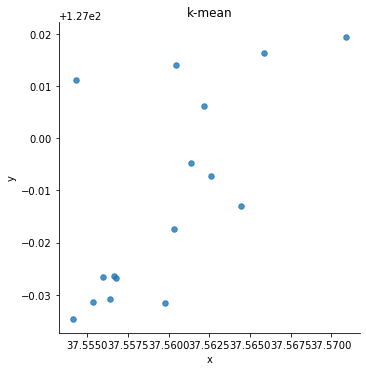

In [4]:
sb.lmplot(x='위도' , y='경도', data=df_large, fit_reg=False, scatter_kws={"s":30}) 
plt.title('k-mean')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
X = df_large.values ## 인덱스를 제외한 값을 ndarray로 추출
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

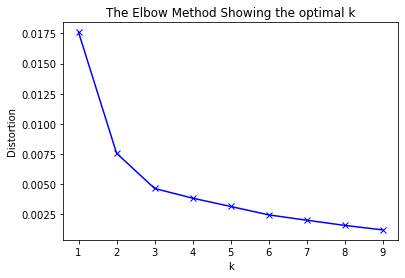

In [6]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the optimal k')
plt.show()

In [7]:
#points=df.values
points=df_large.values
kmeans=KMeans(n_clusters=5).fit(points)

In [8]:
kmeans.cluster_centers_

array([[ 37.55898031, 127.0105133 ],
       [ 37.55644063, 126.97027806],
       [ 37.56200409, 126.99409485],
       [ 37.56837463, 127.0179634 ],
       [ 37.56241798, 126.9848099 ]])

In [9]:
kmeans.labels_

array([4, 2, 0, 0, 1, 3, 1, 2, 1, 0, 3, 1, 4, 1, 1, 1])

In [10]:
df_large['cluster'] = kmeans.labels_
df_large

,위도,경도,cluster
5,37.564476,126.986969,4
9,37.562618,126.992836,2
14,37.554295,127.011200,0
15,37.560474,127.014076,0
16,37.556000,126.973358,1
19,37.565849,127.016403,3
20,37.559780,126.968506,1
23,37.561390,126.995354,2
25,37.554108,126.965408,1
27,37.562172,127.006264,0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

Text(0.5, 1.0, 'k-mean')

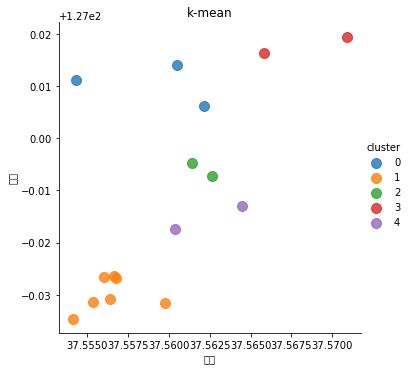

In [11]:
sb.lmplot(x='위도', y='경도', data=df_large, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.title('k-mean')

# group=='적음' 군집화

In [12]:
df_small=df[df['group']=='적음']
df_small=df_small.drop(['대여소번호','대여수','반납수','거치대수','(반납-대여)/거치대수','group'], 1)
len(df_small)

19

Text(-14.325000000000003, 0.5, 'y')

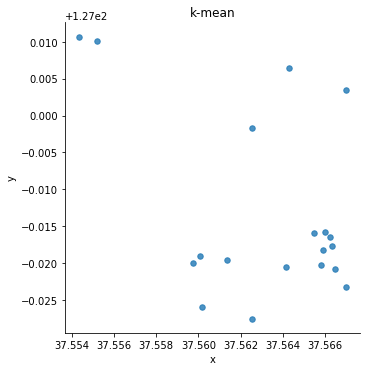

In [13]:
sb.lmplot(x='위도' , y='경도', data=df_small, fit_reg=False, scatter_kws={"s":30}) 
plt.title('k-mean')
plt.xlabel('x')
plt.ylabel('y')

In [14]:
X = df_small.values ## 인덱스를 제외한 값을 ndarray로 추출
distortions = []
K = range(1,7)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

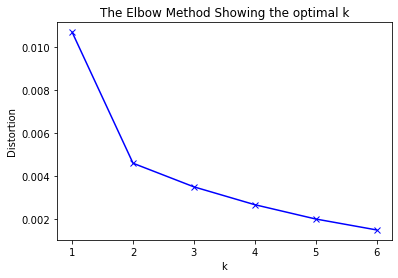

In [15]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the optimal k')
plt.show()

In [16]:
#points=df.values
points=df_small.values
kmeans=KMeans(n_clusters=5).fit(points)

In [17]:
kmeans.cluster_centers_

array([[ 37.5603803 , 126.98044843],
       [ 37.55475998, 127.01037595],
       [ 37.56460953, 127.0027517 ],
       [ 37.56593492, 126.98127409],
       [ 37.56134414, 126.9733009 ]])

In [18]:
kmeans.labels_

array([3, 3, 0, 1, 2, 3, 4, 3, 3, 0, 1, 3, 4, 3, 3, 0, 2, 2, 3])

In [19]:
df_small['cluster'] = kmeans.labels_
df_small

,위도,경도,cluster
3,37.566223,126.983589,3
4,37.565464,126.984139,3
6,37.561340,126.980400,0
18,37.555199,127.010048,1
21,37.566994,127.003464,2
29,37.566345,126.982292,3
35,37.560154,126.974106,4
36,37.565842,126.979813,3
38,37.564159,126.979485,3
40,37.559746,126.980003,0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

Text(0.5, 1.0, 'k-mean')

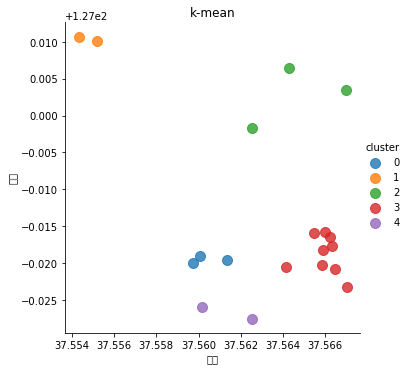

In [20]:
sb.lmplot(x='위도', y='경도', data=df_small, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.title('k-mean')

# 두 그래프 시각화

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

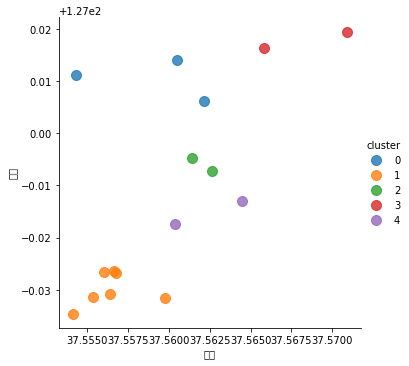

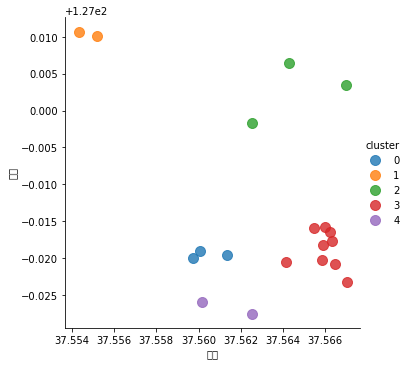

In [21]:
sb.lmplot(x='위도', y='경도', data=df_large, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
sb.lmplot(x='위도', y='경도', data=df_small, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.show()

In [22]:
df_large.loc[(df_large.cluster==0), 'cluster'] = 'B'
df_large.loc[(df_large.cluster==1), 'cluster'] = 'E'
df_large.loc[(df_large.cluster==2), 'cluster'] = 'C'
df_large.loc[(df_large.cluster==3), 'cluster'] = 'A'
df_large.loc[(df_large.cluster==4), 'cluster'] = 'D'

In [23]:
df_small.loc[(df_small.cluster==0), 'cluster'] = 'C'
df_small.loc[(df_small.cluster==1), 'cluster'] = 'B'
df_small.loc[(df_small.cluster==2), 'cluster'] = 'A'
df_small.loc[(df_small.cluster==3), 'cluster'] = 'D'
df_small.loc[(df_small.cluster==4), 'cluster'] = 'E'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

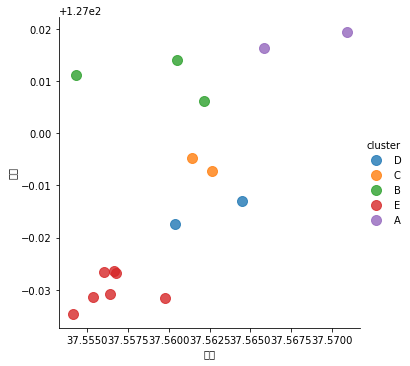

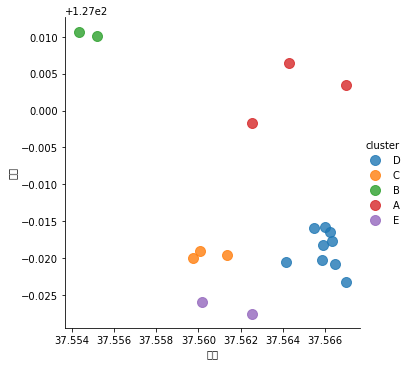

In [24]:
sb.lmplot(x='위도', y='경도', data=df_large, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
sb.lmplot(x='위도', y='경도', data=df_small, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.show()

In [25]:
df=pd.concat([df_large, df_small])
df

,위도,경도,cluster
5,37.564476,126.986969,D
9,37.562618,126.992836,C
14,37.554295,127.011200,B
15,37.560474,127.014076,B
16,37.556000,126.973358,E
19,37.565849,127.016403,A
20,37.559780,126.968506,E
23,37.561390,126.995354,C
25,37.554108,126.965408,E
27,37.562172,127.006264,B


In [26]:
df.to_csv("./k_means(중구, 24, 17_21, k=5)_n_이거.csv",index_label=False,encoding='utf-8')